In [21]:
#Imports
import pandas as pd
import altair as alt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
testClean = data
testClean["job"] = testClean["job"].replace(['unknown'], "admin.")
testClean["marital"] = testClean["marital"].replace(['unknown'], "married")
testClean["education"] = testClean["education"].replace(['unknown'], "university.degree")
testClean["default"] = testClean["default"].replace(['unknown'], "no")
testClean["housing"] = testClean["housing"].replace(['unknown'], "yes")
testClean["loan"] = testClean["loan"].replace(['unknown'], "no")
testClean['poutcome'] = testClean['poutcome'].replace(['nonexistent'], "failure")
testClean['pdays'] = testClean['pdays'].apply(lambda x: np.nan if x == 999 else x)
testClean[['job','marital',"education",'default','housing','contact','month','day_of_week','poutcome','loan','y']] = testClean[['job','marital',"education",'default','housing','contact','month','day_of_week','poutcome','loan','y']].apply(lambda x: pd.factorize(x)[0])
testClean = testClean[~testClean['pdays'].isna()]
testClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373 entries, 21712 to 37060
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1373 non-null   int64  
 1   job             1373 non-null   int64  
 2   marital         1373 non-null   int64  
 3   education       1373 non-null   int64  
 4   default         1373 non-null   int64  
 5   housing         1373 non-null   int64  
 6   loan            1373 non-null   int64  
 7   contact         1373 non-null   int64  
 8   month           1373 non-null   int64  
 9   day_of_week     1373 non-null   int64  
 10  campaign        1373 non-null   int64  
 11  pdays           1373 non-null   float64
 12  previous        1373 non-null   int64  
 13  poutcome        1373 non-null   int64  
 14  emp.var.rate    1373 non-null   float64
 15  cons.price.idx  1373 non-null   float64
 16  cons.conf.idx   1373 non-null   float64
 17  euribor3m       1373 non-nul

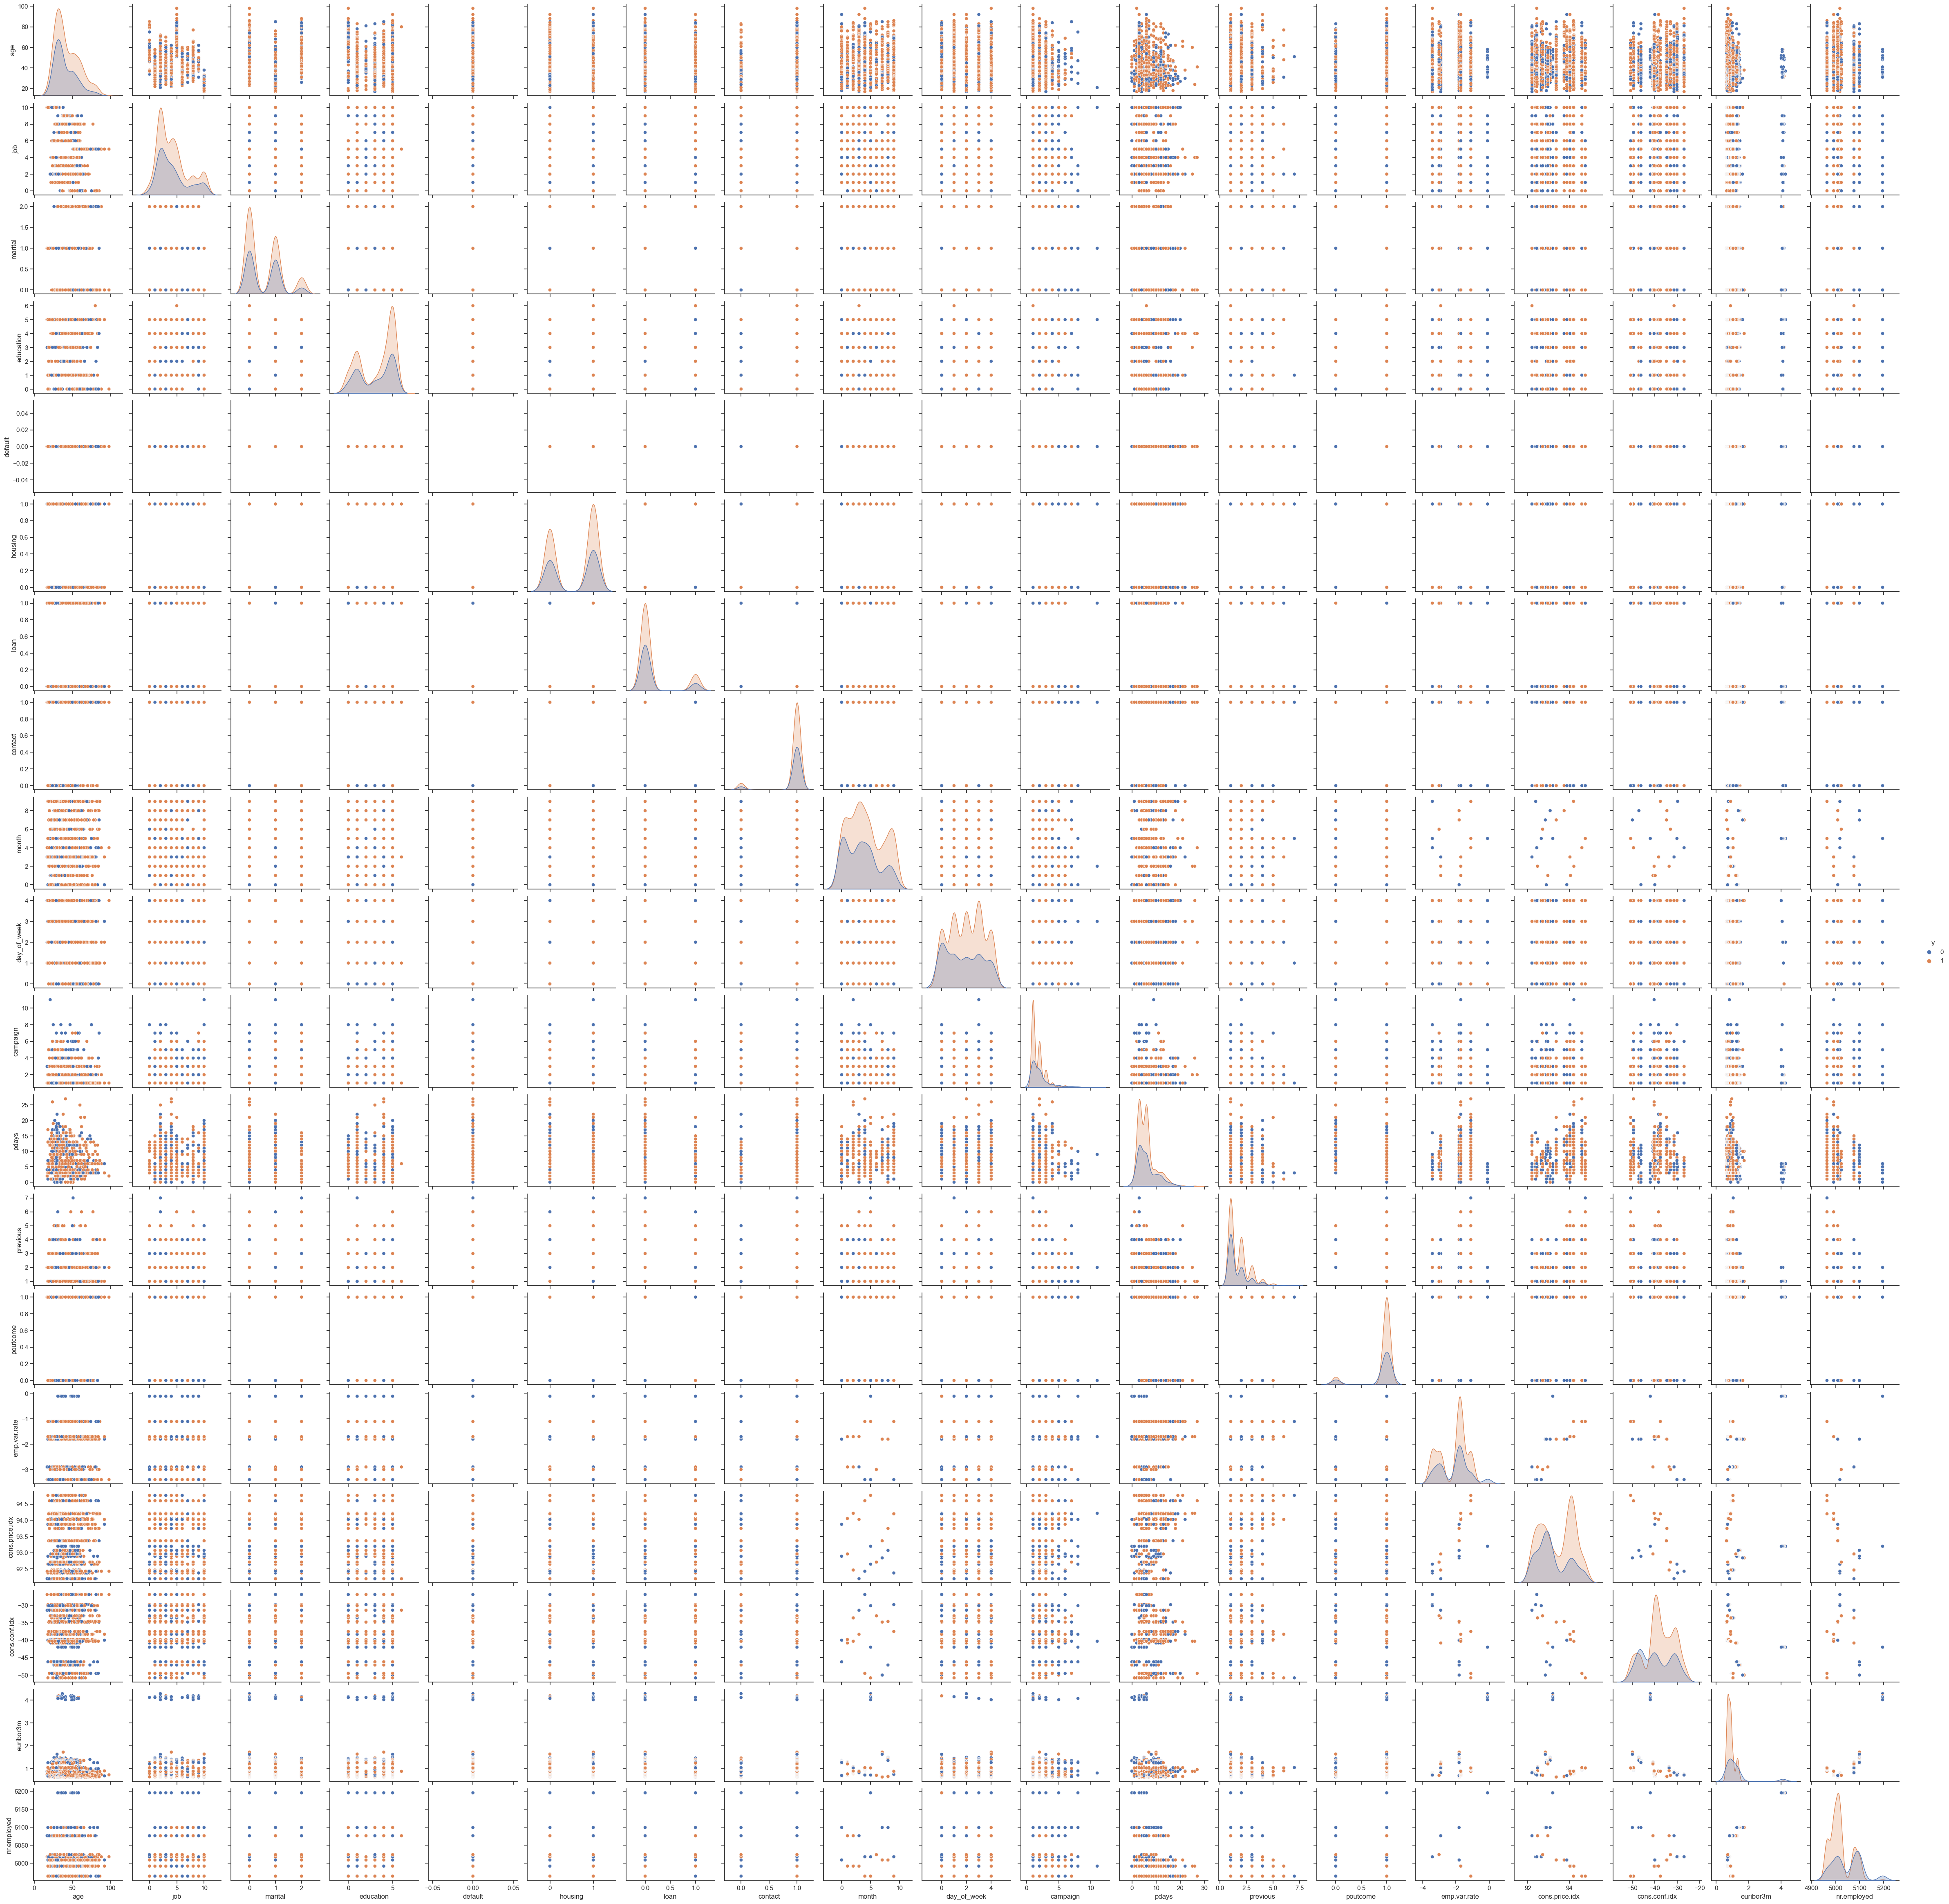

In [33]:
#testClean["pdays"]
sns.pairplot(testClean, hue="y")
#testClean.isnull().sum()

In [29]:
#Splitting the data
X = testClean.iloc[:,0:18]
y = testClean['y']

#Splitting the data into training, validation, and testing
X_main, X_test, y_main, y_test = train_test_split(X, y, test_size=0.15 , random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_main, y_main, test_size=0.15, random_state=42)

In [30]:
#see correlation with validation set and training set
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

euribor3m         0.077850
cons.price.idx    0.063585
cons.conf.idx     0.046168
pdays             0.044008
campaign          0.033167
emp.var.rate      0.027003
age               0.018667
month             0.010178
day_of_week       0.008643
contact           0.006204
marital           0.003132
job               0.000000
loan              0.000000
housing           0.000000
previous          0.000000
poutcome          0.000000
default           0.000000
education         0.000000
dtype: float64